## 0. Install and Import Dependencies

In [1]:
!pip install easyocr #辨識文字用的 要用gpu
!pip install imutils #python處理圖像用工具

     |████████████████████████████████| 63.2MB 48kB/s 


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow


## 1. Read in Image, Grayscale and Blur

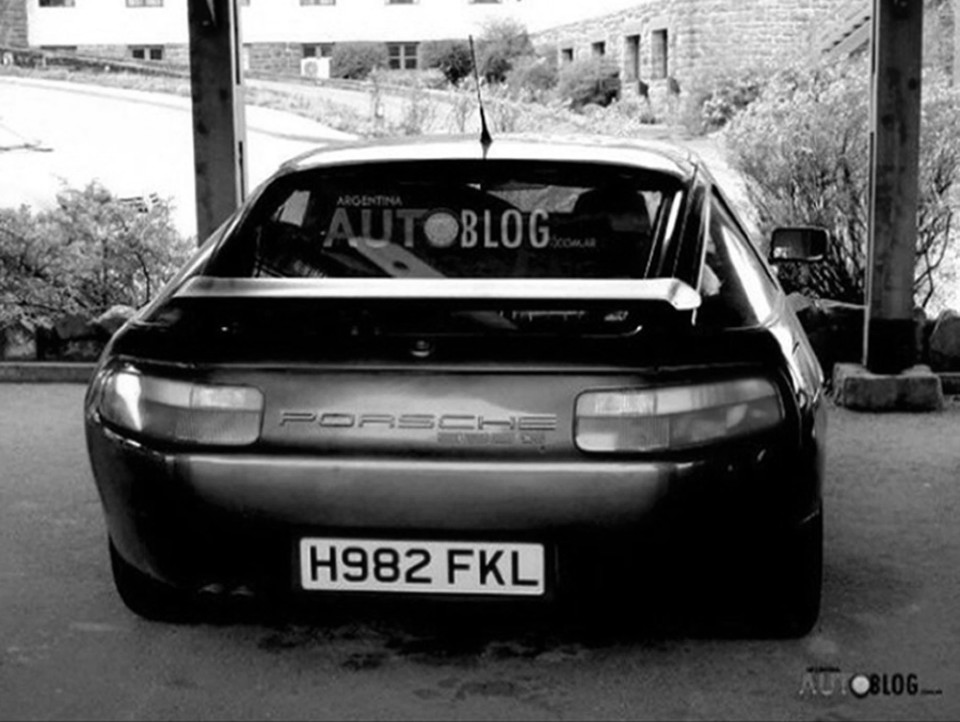

In [3]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#轉灰階
cv2_imshow(gray)

## 2. Apply filter and find edges for localization

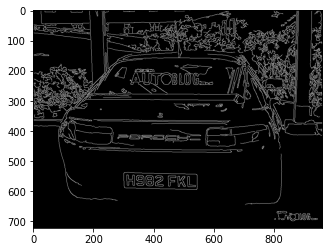

In [4]:
#bfilter去 後Canny
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction     bilateralFilter二邊過濾法－把雜訊去掉
edged = cv2.Canny(bfilter, 30, 200) #Edge detection    Canny邊緣演算法－找出邊緣來－找出圖形中的四方形
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  #findContours 找出Contours  edged.copy()把值複製出來
contours = imutils.grab_contours(keypoints) #imutils.grab_contours把框找出來
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:#針對每個contour，找出大概四方型的點
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break#找到4個點就break存起來

In [8]:
location#找到的4個點（接近4方形）－假定4個點是車牌

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)#全部塗黑－填上0
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) #框出來－濾掉

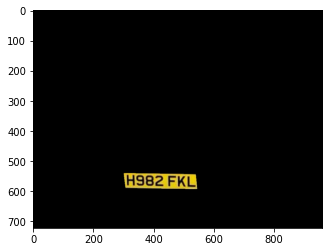

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)#切出來
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]#4個點的質－長、寬切出來  +1多切一個

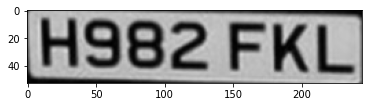

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [13]:
reader = easyocr.Reader(['en'])#設定英文為主
result = reader.readtext(cropped_image)
result#FKL準確率97%

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9757376651726158)]

## 5. Render Result

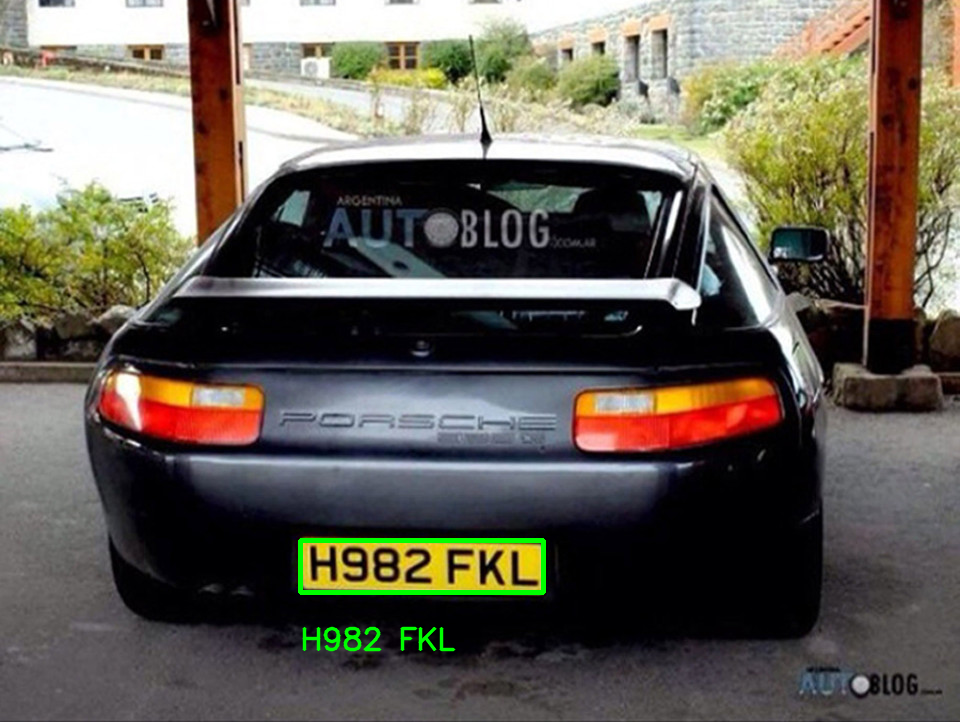

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2_imshow(res)

##image1.jpg車牌辨識

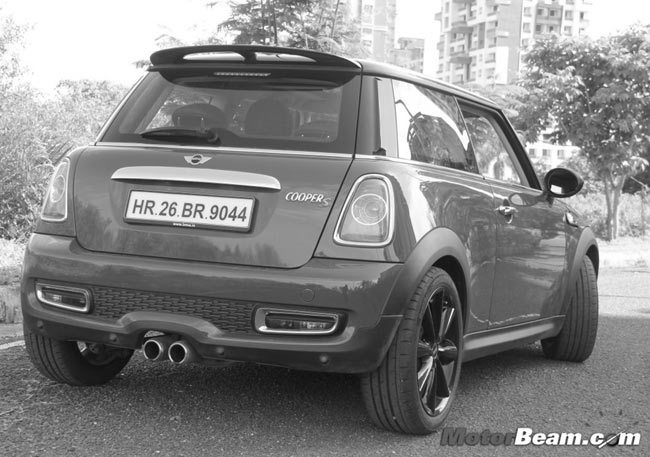

In [15]:
#車牌1
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#轉灰階
cv2_imshow(gray)

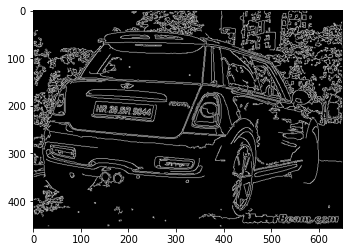

In [16]:
#bfilter去 後Canny
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction     bilateralFilter二邊過濾法－把雜訊去掉
edged = cv2.Canny(bfilter, 30, 200) #Edge detection    Canny邊緣演算法－找出邊緣來－找出圖形中的四方形
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [17]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  #findContours 找出Contours  edged.copy()把值複製出來
contours = imutils.grab_contours(keypoints) #imutils.grab_contours把框找出來
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [18]:
location = None
for contour in contours:#針對每個contour，找出大概四方型的點
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break#找到4個點就break存起來

In [19]:
location#找到的4個點（接近4方形）－假定4個點是車牌

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [20]:
mask = np.zeros(gray.shape, np.uint8)#全部塗黑－填上0
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) #框出來－濾掉

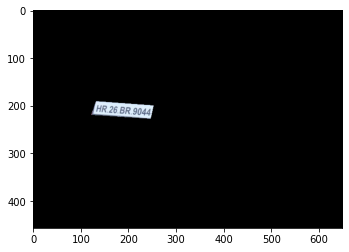

In [21]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [22]:
(x,y) = np.where(mask==255)#切出來
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]#4個點的質－長、寬切出來  +1多切一個

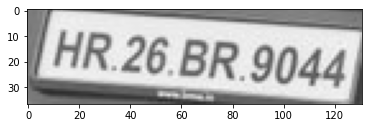

In [23]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [24]:
reader = easyocr.Reader(['en'])#設定英文為主
result = reader.readtext(cropped_image)
result#FKL準確率58%

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5823547430871522)]

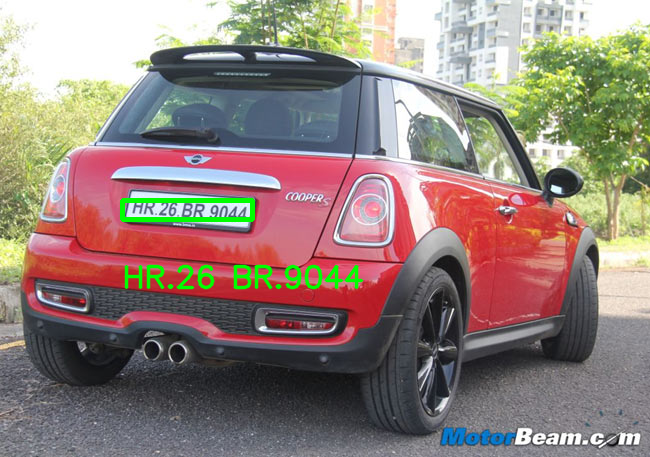

In [25]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2_imshow(res)

##弟弟的車，車牌辨識

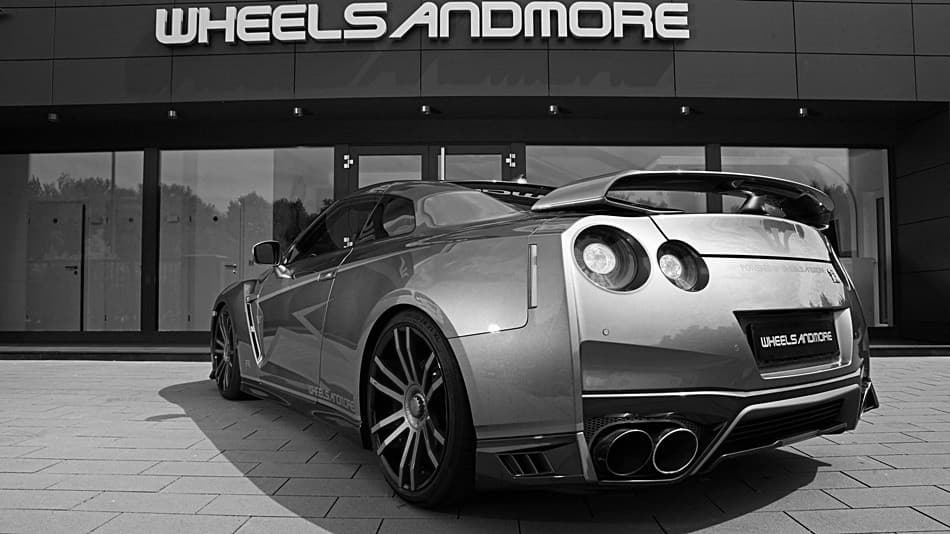

In [276]:

img = cv2.imread('birtherCar1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#轉灰階
cv2_imshow(gray)

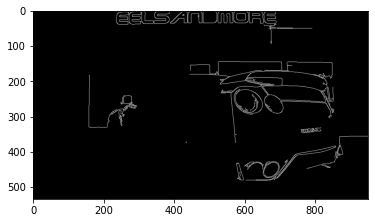

In [351]:
#bfilter去 後Canny
bfilter = cv2.bilateralFilter(gray, 11, 30, 30) #Noise reduction     bilateralFilter二邊過濾法－把雜訊去掉
edged = cv2.Canny(bfilter, 30, 1100) #Edge detection    Canny邊緣演算法－找出邊緣來－找出圖形中的四方形
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [352]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  #findContours 找出Contours  edged.copy()把值複製出來
contours = imutils.grab_contours(keypoints) #imutils.grab_contours把框找出來
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [353]:
location = None
for contour in contours:#針對每個contour，找出大概四方型的點
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break#找到4個點就break存起來

In [354]:
location#找到的4個點（接近4方形）－假定4個點是車牌

array([[[569,   7]],

       [[574,  35]],

       [[610,  31]],

       [[606,   3]]], dtype=int32)

In [355]:
mask = np.zeros(gray.shape, np.uint8)#全部塗黑－填上0
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) #框出來－濾掉

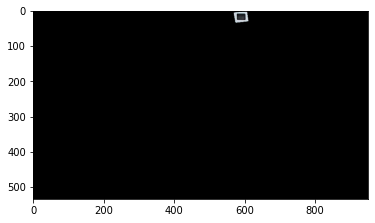

In [356]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [357]:
(x,y) = np.where(mask==255)#切出來
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]#4個點的質－長、寬切出來  +1多切一個

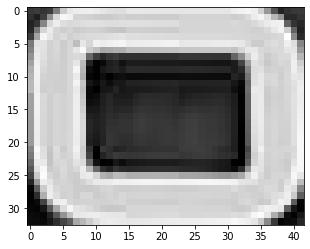

In [358]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))